### In this tutorial we will learn to create tf.data.Dataset to build Python generator and enable Augmentation. 
1. dataset you have is too big to be loaded into memory at once that you run out of RAM
2.  read images __on the go__ when they will be used for training to save memory 

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [36]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape

(dtype('uint8'), (60000, 28, 28), dtype('uint8'), (60000,))

In [37]:
# check the size of dataset in GB
print("Memory size of a NumPy array:",
      np.round(x_train.nbytes*1e-9, 3), "GB")

Memory size of a NumPy array: 0.047 GB


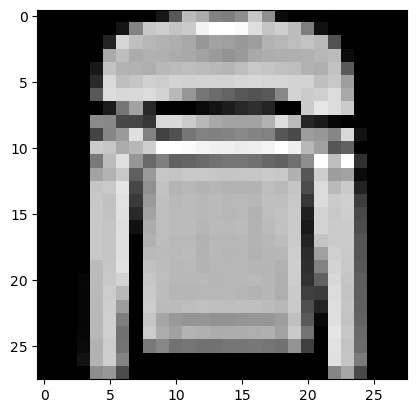

In [89]:
# pick a sample to plot
sample = 5
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [40]:
# Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add one dimension to make 3D images
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

x_train.dtype, x_train.shape, y_train.dtype, y_train.shape

(dtype('float64'), (60000, 28, 28, 1), dtype('uint8'), (60000,))

In [41]:
# check the size of dataset in GB
print("Memory size of a NumPy array:",
      np.round(x_train.nbytes*1e-9, 3), "GB")

Memory size of a NumPy array: 0.376 GB


 If the number of images is 100 times more, to 6 millions, then the memory size ~ 37.6 GB, too big for most hardware, we need __Generator__

### Assuming all of your input data fits in memory, the easiest way to create this Dataset is to convert them to tf.Tensor and then use Dataset.from_tensor_slices

__tf.data.Dataset__ object is a Python iterable. It produces a sequence of elements. 

In [80]:
dataset = tf.data.Dataset.from_tensor_slices([0,1,2,3]) # Creates a Dataset whose elements are slices of the given tensors.

# dataset.element_spec

for element in dataset:
  print(element.numpy())

0
1
2
3


In [81]:
it = iter(dataset)

In [85]:
print(next(it).numpy())

3


In [78]:
# load the data again
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

test_images, test_labels = test
test_images = test_images/255.0

In [79]:
type(images), type(labels)

(numpy.ndarray, numpy.ndarray)

In [74]:
# create a BatchDataset

fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))

fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

# The labels are not required when calling Model.predict.
predict_ds = tf.data.Dataset.from_tensor_slices(test_images).batch(32)

In [69]:
fmnist_train_ds

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.int32)>

In [67]:
# A peek of how BatchDataset 

it = iter(fmnist_train_ds)
print(next(it))

(<tf.Tensor: shape=(32, 28, 28), dtype=float64, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.00392157, 0.        , ..., 0. 

In [70]:
# build model

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [71]:
model.fit(fmnist_train_ds, epochs=2)

Train for 1875 steps
Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5911 - accuracy: 0.8021
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4608 - accuracy: 0.8429


In [59]:
model.fit(fmnist_train_ds.repeat(), epochs=6, steps_per_epoch=40)

Train for 40 steps
Epoch 1/6
40/40 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8508
Epoch 2/6
40/40 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8383
Epoch 3/6
40/40 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8484
Epoch 4/6
40/40 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8367
Epoch 5/6
40/40 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8555
Epoch 6/6
40/40 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8648


In [77]:
# The labels are not required when calling Model.predict.

predict_ds = tf.data.Dataset.from_tensor_slices(test_images).batch(32)

result = model.predict(predict_ds, steps = 5)
print(result.shape)

(80, 10)


### Homowork: What if the total of all of your input data can not fit in memory: 

using ImageDataGenerator.flow_from_directory

https://github.com/asaxton/hal_cnn_tutorial/blob/master/CIFAR-10.ipynb